In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
import pickle 


### Get Data


In [2]:
#reading csv file
df = pd.read_csv("Datasets/fan_0db.csv")
df.shape

(5550, 16)

In [3]:
df.head()

,file_name,y_min,y_max,y_mean,y_std,zcr_mean,zcr_min,zcr_max,spec_cent_min,spec_cent_mean,rms_mean,amp_mean,amp_min,melspec_mean,melspec_std,class
0,Audio_Files/0dB_fan/id_00/abnormal/00000059.wav,-0.032230,0.029817,-6.926849e-07,0.009295,0.031904,0.016113,0.054688,1056.230929,1195.770358,0.009263,0.020296,0.012419,0.020323,0.119019,1
1,Audio_Files/0dB_fan/id_00/abnormal/00000071.wav,-0.034450,0.028665,-6.027881e-07,0.009493,0.021894,0.009766,0.034668,703.965079,800.327823,0.009442,0.020580,0.013375,0.021241,0.128594,1
2,Audio_Files/0dB_fan/id_00/abnormal/00000065.wav,-0.034897,0.028662,5.634240e-06,0.009543,0.027962,0.010742,0.047852,871.776362,998.865525,0.009508,0.020938,0.015119,0.021519,0.125431,1
3,Audio_Files/0dB_fan/id_00/abnormal/00000273.wav,-0.024785,0.026773,5.817374e-07,0.006059,0.057802,0.017578,0.087402,1112.632569,1419.440256,0.006014,0.016007,0.010261,0.008460,0.032597,1
4,Audio_Files/0dB_fan/id_00/abnormal/00000267.wav,-0.034780,0.037046,1.282572e-06,0.004874,0.049731,0.016602,0.279785,771.766407,1154.008254,0.004715,0.012308,0.005732,0.005148,0.024881,1


In [4]:
# drop unnecessary data
df = df.drop(columns = 'file_name')

X = df.drop(columns = 'class')
y = df['class']


In [5]:
count = df['class'].value_counts()
count

0    4075
1    1475
Name: class, dtype: int64

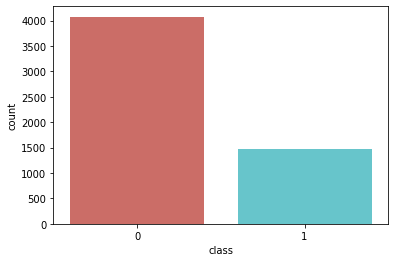

In [6]:
sns.countplot(x='class',data= df, palette= 'hls')
plt.show()

### Split Data

In [7]:
# Split dataset train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Standard Scaler

- Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Find optimal K 

Minimum error:- 0.13513513513513514 at K = 5


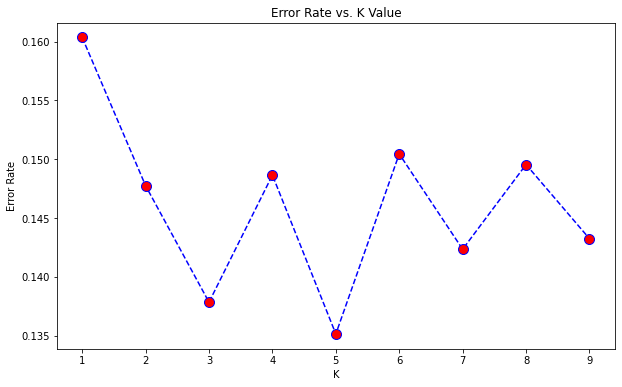

In [9]:
error_rate = []

for i in range(1,10):
 classifier = KNeighborsClassifier(n_neighbors=i)
 classifier.fit(X_train,y_train)
 pred_i = classifier.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

Maximum accuracy:- 0.8648648648648649 at K = 5


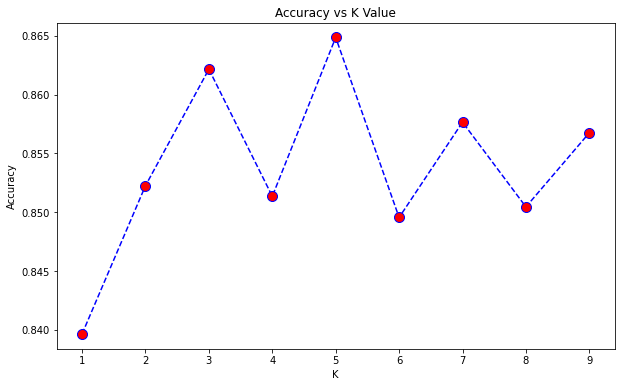

In [10]:
accuracy = []
for i in range(1,10):
    classifier= KNeighborsClassifier(n_neighbors = i)
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10),accuracy,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(accuracy),"at K =",accuracy.index(max(accuracy))+1)

In [11]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

- a small amount of neighbors are most flexible fit which will have low bias but high variance and a large number of neighbors will have a smoother decision boundary which means lower variance but higher bias.
- run the KNN algorithm several times with different values of K and choose the K that reduces the number of errors we encounter while maintaining the algorithm’s ability to accurately make predictions when it’s given data it hasn’t seen before

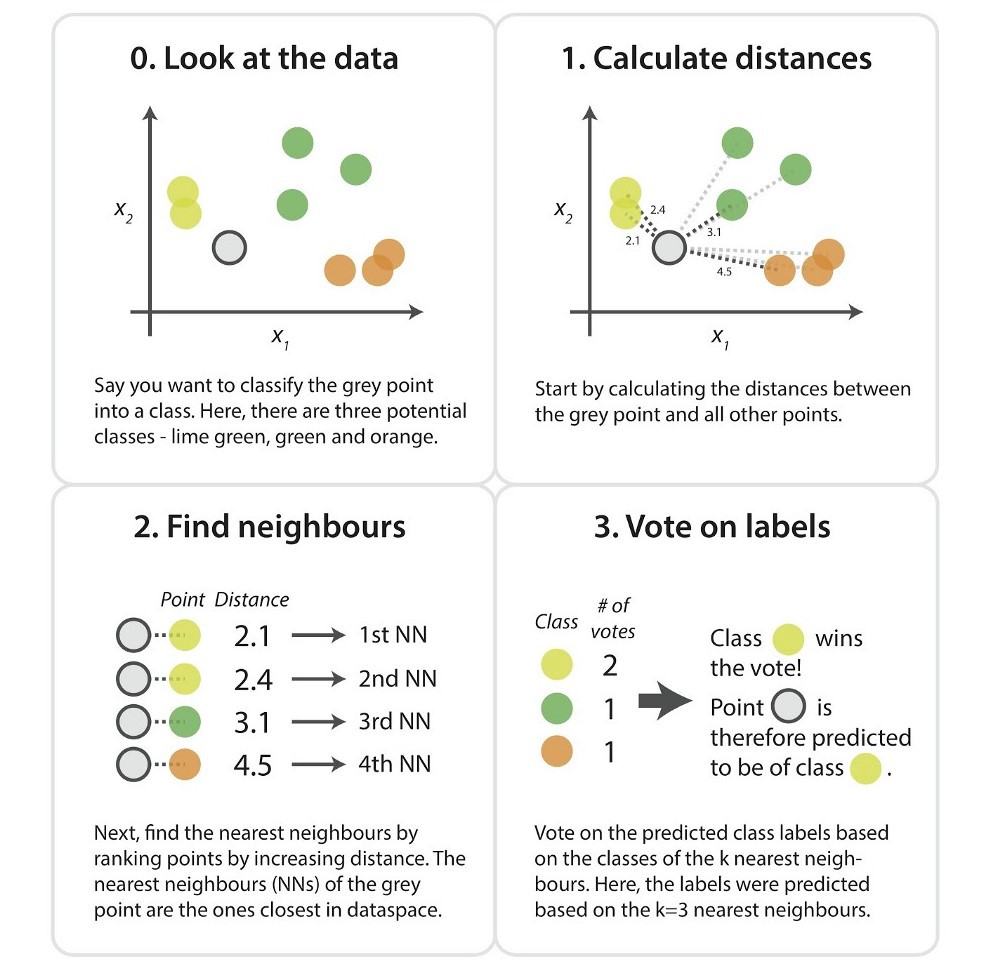

In [12]:
# Predict
y_pred = classifier.predict(X_test)


In [13]:
#Evaluation of the model

print('Test accuracy for KNNS is:',metrics.accuracy_score(y_test,y_pred)*100)

Test accuracy for KNNS is: 86.48648648648648


In [14]:
print('\nConfusion matrix:\n',metrics.confusion_matrix(y_test,y_pred))


Confusion matrix:
 [[780  17]
 [133 180]]


In [15]:
print('\n Classification Report: \n',metrics.classification_report(y_test,y_pred))


 Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       797
           1       0.91      0.58      0.71       313

    accuracy                           0.86      1110
   macro avg       0.88      0.78      0.81      1110
weighted avg       0.87      0.86      0.85      1110



### Overfitting 

In [16]:
def check_overfitting(range_number):
    train_scores, test_scores = list(), list()
    values = [i for i in range(1, range_number)]
    for i in values:
        model = KNeighborsClassifier(n_neighbors=5)
        model.fit(X_train, y_train)
        # train accuracy 
        x_pred = model.predict(X_train)
        train_acc = metrics.accuracy_score(y_train, x_pred)
        train_scores.append(train_acc)
        #test accuracy
        y_pred = model.predict(X_test)
        test_acc = metrics.accuracy_score(y_test, y_pred)
        test_scores.append(test_acc)
        print("{},    Train: {},   Test: {}".format(i, train_acc, test_acc))
        
    plt.plot(values, train_scores, '-o', label='Train')
    plt.plot(values, test_scores, '-o', label='Test')
    plt.legend()
    plt.show()

1,    Train: 0.9067567567567567,   Test: 0.8648648648648649
2,    Train: 0.9067567567567567,   Test: 0.8648648648648649
3,    Train: 0.9067567567567567,   Test: 0.8648648648648649
4,    Train: 0.9067567567567567,   Test: 0.8648648648648649
5,    Train: 0.9067567567567567,   Test: 0.8648648648648649
6,    Train: 0.9067567567567567,   Test: 0.8648648648648649
7,    Train: 0.9067567567567567,   Test: 0.8648648648648649
8,    Train: 0.9067567567567567,   Test: 0.8648648648648649
9,    Train: 0.9067567567567567,   Test: 0.8648648648648649


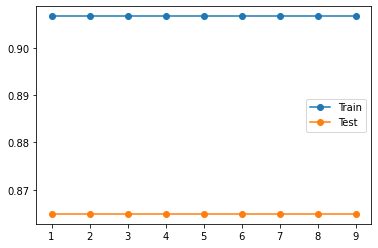

In [17]:
check_overfitting(10)

### Feature Selection

- Variance Threshold Feature Selection
- Univariate Selection using SelectKBest
- Recursive Feature Elimination or RFE
- SelectFromModel
- Sequential Feature Selection or SFS


All results are same with Logistic regression 

### Create New Model With Reduces Features


In [18]:
X = df[['y_std', 'rms_mean', 'amp_mean', 'melspec_mean', 'spec_cent_mean']]
y = df['class']

### Split Data

In [19]:
# Split dataset train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


### Feature Scaling : Standard Scaler

In [20]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Model

In [21]:
print(f'training set size: {X_train.shape[0]} samples \ntest set size: {X_test.shape[0]} samples')

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

training set size: 4440 samples 
test set size: 1110 samples


KNeighborsClassifier()

In [22]:
y_pred = classifier.predict(X_test)


### Evaluation

In [23]:
print('Test accuracy for KNN is:',metrics.accuracy_score(y_test,y_pred)*100)

Test accuracy for KNN is: 91.08108108108108


In [24]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
print('\nConfusion matrix:\n',cnf_matrix)


Confusion matrix:
 [[789  27]
 [ 72 222]]


In [25]:
print('\n Classification Report: \n',metrics.classification_report(y_test,y_pred))


 Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       816
           1       0.89      0.76      0.82       294

    accuracy                           0.91      1110
   macro avg       0.90      0.86      0.88      1110
weighted avg       0.91      0.91      0.91      1110



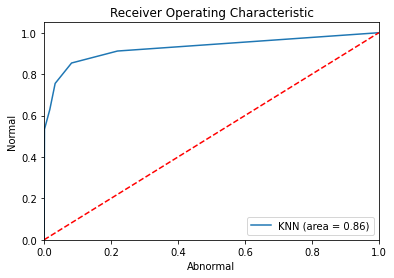

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test,classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Abnormal')
plt.ylabel('Normal')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_Curve_KNN')
plt.show()

### Cross Validation

In [27]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier, X = X, y = y, cv=10)
AccuraciesMean = accuracies.mean()*100
StandardDeviation = accuracies.std()*100

print("%0.2f mean accuracy with a standard deviation of %0.2f" % (AccuraciesMean, StandardDeviation))


70.83 mean accuracy with a standard deviation of 5.33


In [28]:
accuracies

array([0.6018018 , 0.60900901, 0.72792793, 0.71171171, 0.75315315,
       0.71891892, 0.76216216, 0.73693694, 0.72792793, 0.73333333])

### Create a model


In [29]:
# save model
filename = 'fan_0db_KNN.sav'
pickle.dump(classifier, open(filename, 'wb'))


In [30]:
# try model
rf_model = pickle.load(open(filename, 'rb'))


In [31]:
result = rf_model.predict(X_test)

In [32]:
result

array([0, 0, 0, ..., 0, 0, 1])